In [1]:
import ROOT

Welcome to JupyROOT 6.24/06


In [2]:
# Defining the dataset

S = 5.7 # Signal
B = 8.9 # Background
O = 18  # Observed data

# Creating the histograms
hS = ROOT.TH1D("S", "S", 1, 0, 1)
hB = ROOT.TH1D("B", "B", 1, 0, 1)
hO = ROOT.TH1D("O", "O", 1, 0, 1)

# Assigning event yields to histograms
hS.SetBinContent(1, S)
hB.SetBinContent(1, B)
hO.SetBinContent(1, O)

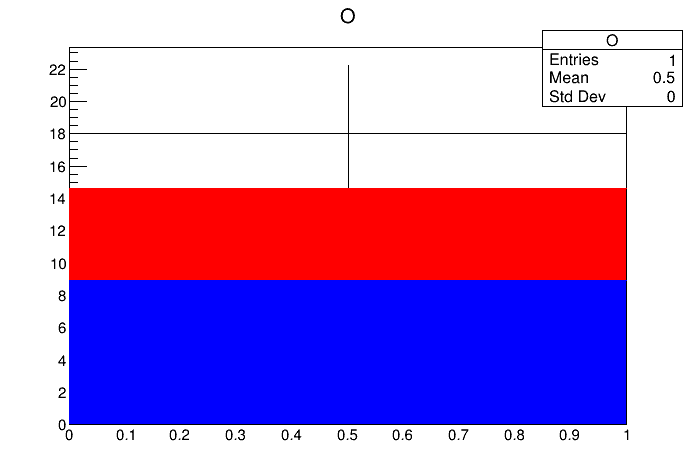

In [3]:
c = ROOT.TCanvas("")
s = ROOT.THStack("stack", "Event Yields")
hB.SetLineColor(ROOT.kBlue)
hB.SetFillColor(ROOT.kBlue)
s.Add(hB)
hS.SetLineColor(ROOT.kRed)
hS.SetFillColor(ROOT.kRed)
s.Add(hS)
hO.SetLineColor(ROOT.kBlack)
hO.SetMinimum(0)

hO.Draw("same E0")
s.Draw("hist same")

c.Draw()

In [4]:
# Creating HistFactory model
meas = ROOT.RooStats.HistFactory.Measurement("NumberCounting", "NumberCounting")
meas.SetOutputFilePrefix("workspaces/NumberCounting/ws")
meas.SetExportOnly(1)
meas.SetPOI("mu") # Setting Parameter Of Interest (POI)

meas.SetLumi(1.0)
meas.SetLumiRelErr(0.019) # Typical uncertainty on integrated luminosity at LHC Run-2


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [5]:
!mkdir -p /cmpp/Lecture2_Fitting/workspaces/NumberCounting

In [6]:
# Creating the parameters of the model

muS = ROOT.RooStats.HistFactory.NormFactor()
muS.SetName("mu")
muS.SetHigh(100)    # Highest possible value in fit
muS.SetLow(0)       # Lowest possible value in fit
muS.SetVal(1)       # Nominal value

# Creating the Signal Region (SR)
SR = ROOT.RooStats.HistFactory.Channel("SR")
SR.SetData(hO) # Assigning the observed events as data

# Adding the signal and background samples

sS = ROOT.RooStats.HistFactory.Sample("S")
sS.SetHisto(hS)
sS.AddNormFactor(muS)
SR.AddSample(sS)

sB = ROOT.RooStats.HistFactory.Sample("B")
sB.SetHisto(hB)
SR.AddSample(sB)

meas.AddChannel(SR)

meas.PrintTree()

Measurement Name: NumberCounting	 OutputFilePrefix: workspaces/NumberCounting/ws	 POI: mu	 Lumi: 1	 LumiRelErr: 0.019	 BinLow: 0	 BinHigh: 1	 ExportOnly: 1
Channels:
	 Channel Name: SR	 InputFile: 
	 Data:
	 	 InputFile: 	 HistoName: O	 HistoPath: 	 HistoAddress: 0x93f4940
	 statErrorConfig:
	 	 RelErrorThreshold: 0.05	 ConstraintType: Poisson
	 Samples: 
	 	 Name: S	 	 Channel: SR	 NormalizeByTheory: True	 StatErrorActivate: False
	 	 	 	 	 InputFile: 	 HistName: S	 HistoPath: 	 HistoAddress: 0x93f5300
	 	 Name: B	 	 Channel: SR	 NormalizeByTheory: True	 StatErrorActivate: False
	 	 	 	 	 InputFile: 	 HistName: B	 HistoPath: 	 HistoAddress: 0x93f5d30
	 End of Channel SR
[#2] INFO:HistFactory -- End Measurement: NumberCounting


In [7]:
ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

[#2] INFO:HistFactory -- Making Model and Measurements (Fast) for measurement: NumberCounting
[#2] INFO:HistFactory -- using lumi = 1 and lumiError = 0.019 including bins between 0 and 1
[#2] INFO:HistFactory -- fixing the following parameters:
[#2] INFO:HistFactory -- Creating the output file: workspaces/NumberCounting/ws_NumberCounting.root
[#2] INFO:HistFactory -- Creating the table file: workspaces/NumberCounting/ws_results.table
[#2] INFO:HistFactory -- Creating the HistoToWorkspaceFactoryFast factory
[#2] INFO:HistFactory -- Setting preprocess functions
[#2] PROGRESS:HistFactory -- Starting to process channel: SR
[#2] PROGRESS:HistFactory -- 
-----------------------------------------
	Starting to process 'SR' channel with 1 observables
-----------------------------------------

[#2] INFO:HistFactory -- lumi str = [1,0,10]
[#2] INFO:HistFactory -- lumi Error str = nominalLumi[1,0,1.19],0.019
[#2] INFO:HistFactory -- making normFactor: mu
[#2] WARNING:HistFactory -- Const attribute

In [8]:
!ls /cmpp/Lecture2_Fitting/workspaces/NumberCounting

ws_NumberCounting.root		 ws_combined_NumberCounting_model.root
ws_SR_NumberCounting_model.root  ws_results.table


In [9]:
oF = ROOT.TFile.Open("/cmpp/Lecture2_Fitting/workspaces/NumberCounting/ws_combined_NumberCounting_model.root")
oF.ls()

TFile**		/cmpp/Lecture2_Fitting/workspaces/NumberCounting/ws_combined_NumberCounting_model.root	
 TFile*		/cmpp/Lecture2_Fitting/workspaces/NumberCounting/ws_combined_NumberCounting_model.root	
  KEY: RooWorkspace	combined;1	combined
  KEY: TProcessID	ProcessID0;1	c4a9059e-98fd-11ec-91b3-020011acbeef
  KEY: TDirectoryFile	SR_hists;1	SR_hists
  KEY: RooStats::HistFactory::Measurement	NumberCounting;1	NumberCounting


In [10]:
ws = oF.Get("combined")
ws.Print()


RooWorkspace(combined) combined contents

variables
---------
(Lumi,binWidth_obs_x_SR_0,binWidth_obs_x_SR_1,channelCat,mu,nominalLumi,obs_x_SR,weightVar)

p.d.f.s
-------
RooRealSumPdf::SR_model[ binWidth_obs_x_SR_0 * L_x_S_SR_overallSyst_x_Exp + binWidth_obs_x_SR_1 * L_x_B_SR_overallSyst_x_Exp ] = 14.6
RooGaussian::lumiConstraint[ x=Lumi mean=nominalLumi sigma=0.019 ] = 1
RooProdPdf::model_SR[ lumiConstraint * SR_model(obs_x_SR) ] = 14.6
RooSimultaneous::simPdf[ indexCat=channelCat SR=model_SR ] = 14.6

functions
--------
RooHistFunc::B_SR_nominal[ depList=(obs_x_SR) depList=(obs_x_SR) ] = 8.9
RooProduct::B_SR_overallSyst_x_Exp[ B_SR_nominal * B_SR_epsilon ] = 8.9
RooProduct::L_x_B_SR_overallSyst_x_Exp[ Lumi * B_SR_overallSyst_x_Exp ] = 8.9
RooProduct::L_x_S_SR_overallSyst_x_Exp[ Lumi * S_SR_overallSyst_x_Exp ] = 5.7
RooHistFunc::S_SR_nominal[ depList=(obs_x_SR) depList=(obs_x_SR) ] = 5.7
RooProduct::S_SR_overallNorm_x_sigma_epsilon[ mu * S_SR_epsilon ] = 1
RooProduct::S_SR_overallSy

In [11]:
ws.data("obsData").Print()

RooDataSet::obsData[channelCat,obs_x_SR,weight:weightVar] = 1 entries (18 weighted)


In [12]:
ws.set("ModelConfig_NuisParams").Print("v")

  1) 0xace22b0 RooRealVar:: Lumi = 1  L(0 - 10)  "Lumi"


In [13]:
ws.set("ModelConfig_POI").Print("v")

  1) 0xaefe040 RooRealVar:: mu = 1  L(0 - 100)  "mu"


In [14]:
ws.pdf("simPdf").Print("")

RooSimultaneous::simPdf[ indexCat=channelCat SR=model_SR ] = 14.6


In [15]:
ws.pdf("simPdf").Print("v")

--- RooAbsArg ---
  Value State: DIRTY
  Shape State: DIRTY
  Attributes: 
  Address: 0xaea5550
  Clients: 
  Servers: 
    (0xacce5a0,V-) RooProdPdf::model_SR "product of Poissons accross bins for a single channel"
    (0xaaf2680,V-) RooCategory::channelCat "channelCat"
  Proxies: 
    !plotCoefNormSet -> 
    indexCat -> channelCat
    SR -> model_SR
--- RooAbsReal ---

  Plot label is "simPdf"
--- RooAbsPdf ---
Cached value = 0
